# COMPET 분석
#### 기본
- unique 고객번호 : 5,881건
- 이용횟수 합계 : 28159건 = (row갯수)
- 2014년은 없음, 2015년만 있음

#### ㅁ
- 

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cx_Oracle
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc    # 기본 폰트 설정
rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()

In [9]:
# 대문자로 묶은 데이터프레임 생성
df_m['대문자_경쟁사'] = df_m['경쟁사'].str[0].str.upper()
df_grouped = df_m.groupby('대문자_경쟁사').sum()
df_grouped

,이용년월
대문자_경쟁사,
A,6385
B,13526
C,5176
D,3072


In [19]:
cursor.execute('''
select 경쟁사, count(이용년월) 이용년월
from compet
group by 경쟁사
order by 경쟁사
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_m = pd.DataFrame(x, columns=col_names)
# df_m.head()

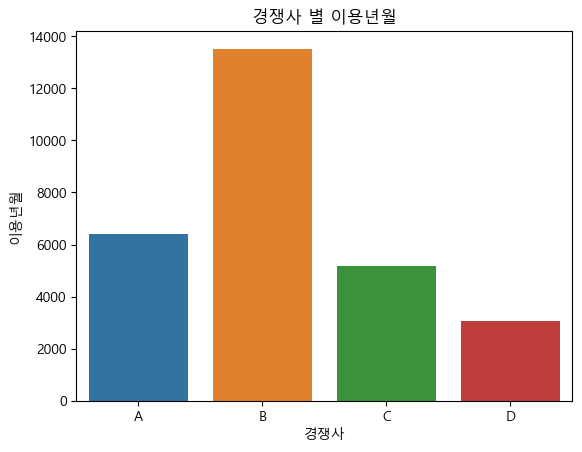

In [14]:
sns.barplot(data=df_grouped, x=df_grouped.index, y='이용년월')
plt.xlabel('경쟁사')
plt.ylabel('이용년월')
plt.title('경쟁사 별 이용년월')
plt.show()

In [16]:
df_m

,경쟁사,이용년월
0,A01,3262
1,A02,3123
2,B01,7682
3,B02,5844
4,C01,1013
5,C02,852
6,C03,3311
7,D01,483
8,D02,2589


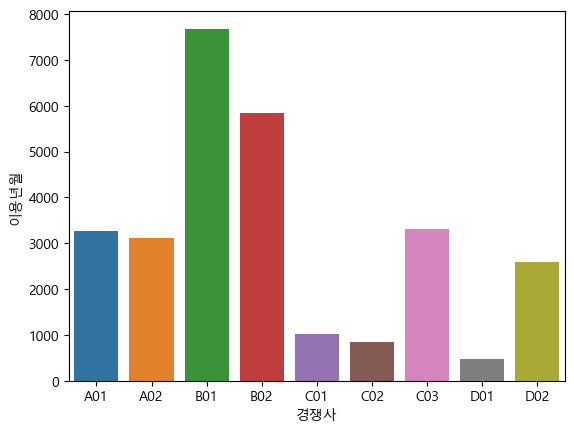

In [17]:
sns.barplot(data=df_m, x='경쟁사', y='이용년월')
plt.xlabel('경쟁사')
plt.ylabel('이용년월')
plt.show()

In [23]:
cursor.execute('''
select 이용년월, count(*) 이용횟수
from compet
group by 이용년월
order by 이용년월
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_m = pd.DataFrame(x, columns=col_names)
df_m.head()

,이용년월,이용횟수
0,201501,2327
1,201502,2032
2,201503,2344
3,201504,2246
4,201505,2380


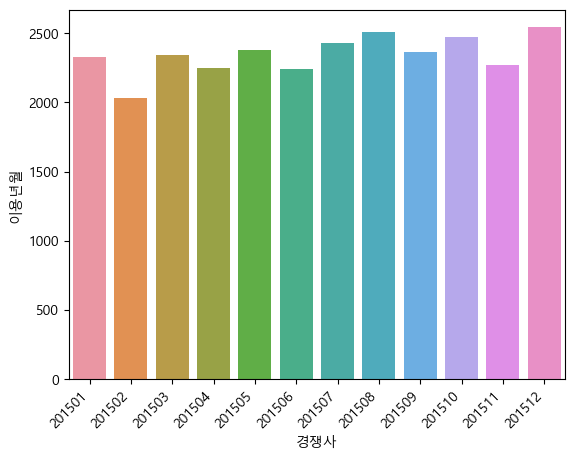

In [25]:
sns.barplot(data=df_m, x='이용년월', y='이용횟수')
plt.xticks(rotation=45, ha='right')
plt.xlabel('경쟁사')
plt.ylabel('이용년월')
plt.show()